# TC1002S Herramientas computacionales: el arte de la analítica

This is a notebook for all your work for the final evidence of this course.


# Niveles de dominio a demostrar con la evidencia

### SING0202A

Interpreta interacciones entre variables relevantes en un problema, como base para la construcción de modelos bivariados basados en datos de un fenómeno investigado que le permita reproducir la respuesta del mismo. Es capaz de construir modelos bivariados que expliquen el comportamiento de un fenómeno.


# Student information

- Name: Fausto Alejandro Palma Cervantes

- ID: A01639224

- My career: ITC

# Importing libraries

In [192]:
# Import the packages that we will be using
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Ignore warning messages (for subplot printing style)
import warnings
warnings.filterwarnings("ignore")

# A1 Load your dataset

In [193]:
# url string that hosts our .csv file
url = "A01639224.csv"

# Read the .csv file, store it as a pandas Data Frame and set column names
dataset = pd.read_csv(url)

# Rename first column
dataset = dataset.rename(columns={"Unnamed: 0": "Index"})

# A2 Data Managment

Print the first 7 rows

In [194]:
dataset.head(7)

,Index,x1,x2
0,0,-0.500283,-7.308327
1,1,-7.252604,3.049801
2,2,-4.121700,-8.795906
3,3,-2.962343,3.550907
4,4,-2.837079,-8.055468
5,5,-2.605676,2.422588
6,6,-7.602795,-0.600449


Print the first 4 last rows

In [195]:
dataset.tail(4)

,Index,x1,x2
220,220,-6.142662,0.830078
221,221,-6.225056,1.072266
222,222,-2.350790,-8.653408
223,223,-1.414436,0.121872


How many rows and columns are in your data?

Use the `shape` method


In [196]:
dataset.shape

(224, 3)

Print the name of all columns 

Use the `columns` method

In [197]:
dataset.columns

Index(['Index', 'x1', 'x2'], dtype='object')

What is the data type in each column

Use the `dtypes` method 

In [198]:
dataset.dtypes

Index      int64
x1       float64
x2       float64
dtype: object

What is the meaning of rows and columns?

In [199]:
# Your responses here

# 1) 

# 2) 

# 3) 

#...

Print a statistical summary of your columns


In [200]:
dataset.describe()

,Index,x1,x2
count,224.000000,224.000000,224.000000
mean,111.500000,-1.035504,-3.537513
std,64.807407,6.208938,4.503862
min,0.000000,-10.691624,-13.467997
25%,55.750000,-5.274069,-7.714047
50%,111.500000,-3.069764,-3.482262
75%,167.250000,2.276204,0.483285
max,223.000000,13.182518,4.931413


In [201]:
# 1) What is the minumum and maximum values of each variable

# 2) What is the mean and standar deviation of each variable

# 3) What the 25%, 50% and 75% represent?



Rename the columns using the same name with capital letters

In [202]:
dataset = dataset.rename(columns={"Index": "INDEX", "x1": "X1", "x2": "X2"})

dataset.head()

,INDEX,X1,X2
0,0,-0.500283,-7.308327
1,1,-7.252604,3.049801
2,2,-4.121700,-8.795906
3,3,-2.962343,3.550907
4,4,-2.837079,-8.055468


Rename the columns to their original names

In [203]:
dataset = dataset.rename(columns={"INDEX": "Index", "X1": "x1", "X2": "x2"})

dataset.head()

,Index,x1,x2
0,0,-0.500283,-7.308327
1,1,-7.252604,3.049801
2,2,-4.121700,-8.795906
3,3,-2.962343,3.550907
4,4,-2.837079,-8.055468


Use two different alternatives to get one of the columns

In [204]:
a = dataset.x1
b = dataset["x2"]

print(a, end='\n\n')
print(b)

0     -0.500283
1     -7.252604
2     -4.121700
3     -2.962343
4     -2.837079
         ...   
219   -2.587571
220   -6.142662
221   -6.225056
222   -2.350790
223   -1.414436
Name: x1, Length: 224, dtype: float64

0     -7.308327
1      3.049801
2     -8.795906
3      3.550907
4     -8.055468
         ...   
219   -3.083335
220    0.830078
221    1.072266
222   -8.653408
223    0.121872
Name: x2, Length: 224, dtype: float64


Get a slice of your data set: second and thrid columns and rows from 62 to 72

In [205]:
dataset.loc[62:72, ["x1", "x2"]]

,x1,x2
62,-5.659232,0.164379
63,-6.942446,-0.632737
64,9.120266,-5.668132
65,-2.921856,0.543256
66,-3.736895,-2.273532
67,-3.146570,-8.792103
68,-7.698726,2.318641
69,-2.190783,-6.884594
70,-9.103135,0.316579
71,-1.119237,-9.244213


For the second and thrid columns, calculate the number of null and not null values and verify that their sum equals the total number of rows

In [206]:
print("Null x1 values:", pd.isnull(dataset.x1).sum())
print("Not null x1 values:", dataset.x1.notnull().sum())
print("Total x1 values:", (pd.isnull(dataset.x1).sum() + dataset.x1.notnull().sum()))

Null x1 values: 0
Not null x1 values: 224
Total x1 values: 224


In [207]:
print("\nNull x2 values:", pd.isnull(dataset.x2).sum())
print("Not null x2 values:", dataset.x2.notnull().sum())
print("Total x2 values:", (pd.isnull(dataset.x2).sum() + dataset.x2.notnull().sum()))


Null x2 values: 0
Not null x2 values: 224
Total x2 values: 224


Discard the first column


In [208]:
dataset.drop("Index", axis=1, inplace = True)
dataset

,x1,x2
0,-0.500283,-7.308327
1,-7.252604,3.049801
2,-4.121700,-8.795906
3,-2.962343,3.550907
4,-2.837079,-8.055468
...,...,...
219,-2.587571,-3.083335
220,-6.142662,0.830078
221,-6.225056,1.072266
222,-2.350790,-8.653408


### Questions 

Based on the previos reults, provide a description of yout dataset

Your response:




# A3 Data visualization

Plot in the same figure the histogram of the two first two variables

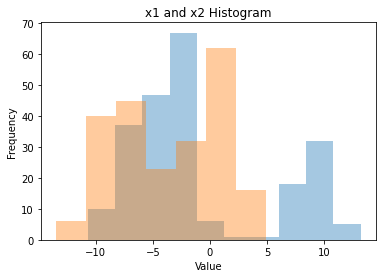

In [209]:
sns.distplot(dataset["x1"], kde = False)
dfhist = sns.distplot(dataset["x2"], kde = False)
dfhist.set_title("x1 and x2 Histogram")
dfhist.set_xlabel("Value")
dfhist.set_ylabel("Frequency")

plt.show()


Based on this two plots, provide a description of your data:

Your response here:

Plot in the same figure the boxplot of the two first two variables 

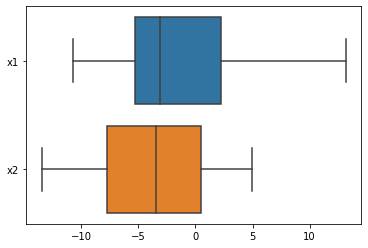

In [210]:
x1andx2 = dataset.loc[:, ["x1", "x2"]]
x2bp = sns.boxplot(data=x1andx2, orient="h")
dfhist.set_title("x1 and x2 Boxplot")
dfhist.set_xlabel("Value")
dfhist.set_ylabel("Frequency")

plt.show()

Scatter plot of the two first variables

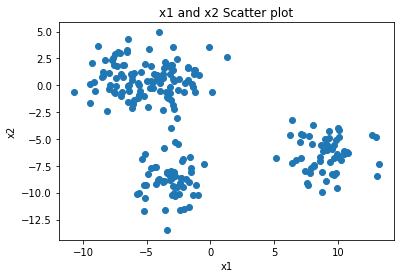

In [211]:
plt.scatter(dataset.x1,dataset.x2)
plt.title("x1 and x2 Scatter plot")
plt.xlabel('x1')
plt.ylabel('x2')

plt.show()

### Questions 

Based on the previos plots, provide a description of yout dataset

Your response:




# A4 Kmeans

Do Kmeans clustering assuming a number of clusters accorgind to your scatter plot

In [212]:
# Define number of clusters
K = 3
km = KMeans(n_clusters=K)

# Do K-means clustering (assing each point in the dataset to a cluster)
yp = km.fit_predict(dataset[['x1','x2']])

# Add a new column to the dataset with the cluster information
dataset['ClusterInfo'] = yp

df0 = dataset[dataset.ClusterInfo==0]
df1 = dataset[dataset.ClusterInfo==1]
df2 = dataset[dataset.ClusterInfo==2]

plt.scatter(df0.x1, df0.x2, Label='Cluster 1')
plt.scatter(df1.x1, df1.x2, Label='Cluster 2')
plt.scatter(df2.x1, df2.x2, Label='Cluster 3')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='k', marker='o', label='Centroids', s=200, alpha=0.5)

plt.title('K-MEANS CLUSTERING WITHOUT SCALED DATA')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()

NameError: name 'KMeans' is not defined

Add to your dataset a column with the assigned cluster of each data point

Print the number associated to each cluster

Print the centroids

Print the intertia metric

Plot a scatter plot of your data assigned to each cluster. Also plot the centroids

### Questions 

Provides a detailed description of your results

Your response:

# A4 Elbow plot

Compute the Elbow plot

### Questions 

What is the best number of clusters K? (argue your response)

Your response:


Does this number of clusters agree with your inital guess? (argue your response)

Your response:



# A4 Normalizing the data: preprocessing using min max scaler


Normalize the data using min max scaler

Print a statistical summary of your columns (normalized data)

In [ ]:
# 1) What is the minumum and maximum values of each variable

# 2) What is the mean and standar deviation of each variable

# 3) What the 25%, 50% and 75% represent?

# 4) Are the minimum and maximum values equal to your original data?


Plot the scatter plot of your normalizaed data

Do Kmeans clustering assuming a number of clusters accorgind to your scatter plot

Add to your dataset a column with the assihned cluster to each data point

Print the centroids

Print the intetia metric

Plot a scatter plot of your data assigned to each cluster. Also plot the centroids

### Questions 

Provides a detailed description of your results. Does the normalization improves the clustering?

Your response:

# BONUS

1) Generate some data using the "make_blobs" function from "sklearn.datasets"

- The number of observations is equal to the three last digits in your ID

- 2 variables

- 4 clusters

- Standar deviation of each cluster of 1.5



2) Plot the scatter plot of your data using the real cluster labels

3) Do K means clustering 

4) Plot the scatter plot of your data using the estimated cluster labels

### Questions 

Provides a detailed description of your results.

Your response:

# Descipcion de tu percepcion del nivel de desarrollo de la subcompetencia 

### SING0202A Interpretación de variables


Escribe tu description del nivel de logro del siguiente criterio de la subcompetencia

**Interpreta interacciones**. Interpreta interacciones entre variables relevantes en un problema, como base para la construcción de modelos bivariados basados en datos de un fenómeno investigado que le permita reproducir la respuesta del mismo.

Tu respuesta:

Escribe tu description del nivel de logro del siguiente criterio de la subcompetencia

**Construcción de modelos**. Es capaz de construir modelos bivariados que expliquen el comportamiento de un fenómeno.

Tu respuesta: